In [34]:
# set the autoreload and the inline plotting for matplotlib
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# download
import requests
import json

# data manipulation
import numpy as np
import numpy.ma as ma

# geometry manipulation
import geopandas as gpd
import shapely.geometry
import shapely.wkt
from shapely.geometry import Point, MultiPolygon, Polygon

# image manipulation
import skimage.feature
import skimage.filters
import skimage.morphology
import rasterio




# Sentinel Hub
#from sentinelhub import BBox, CRS
from sentinelhub import *

#from pyproj import *
#CRS("ESRI:54009")

# eo-learn related
from eolearn.core import EOTask, LinearWorkflow, FeatureType
from eolearn.io import S2L1CWCSInput
from eolearn.mask import AddCloudMaskTask, AddValidDataMaskTask, get_s2_pixel_cloud_detector
from eolearn.geometry import VectorToRaster

# plotting
import matplotlib
import matplotlib.patheffects
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

rasterio.crs.CRS.from_string("epsg:28992")
rasterio.crs.CRS.from_epsg(28992)




CRS.from_epsg(28992)

In [28]:

with open('Reserviour.json') as f:
    data = json.load(f)
wb_url = f'https://water.blue-dot-observatory.com/api/waterbodies/8103/index.html'
wb_data = requests.get(wb_url).json()

#op2= (data['features']['0']['geometry']['coordinates'])
#op2= shapely.geometry.shape(data['features'][0]['geometry'])
op2= shapely.geometry.shape(data['features'][0]['geometry'])
#op1=shapely.geometry.shape(wb_data['nominal_outline']['geometry'])




In [29]:
#print(op1)

In [30]:
#print(op2)

In [38]:
def get_nominal_geometry(waterbody_id):
    """ A function for obtaining the nominal water geometry from the water observatory API
    """
    with open('Reserviour.json') as f:
        data = json.load(f)

    #wb_url = f'https://water.blue-dot-observatory.com/api/waterbodies/{waterbody_id}/index.html'
    #wb_data = requests.get(wb_url).json()
    op2= shapely.geometry.shape(data['features'][2]['geometry'])
    return op2
    #return shapely.geometry.shape(wb_data['nominal_outline']['geometry'])

def plot_geometry(geom, ax=None, **kwargs):
    """ An utility function for plotting the geometry 
    """
    if geom is None or geom.exterior is None:
        return

    x,y = geom.exterior.xy
    if ax is None:
        fig = plt.figure(figsize=(20, 10))
        ax = fig.add_subplot(111)
        
    ax.plot(x, y, **kwargs)

In [39]:
WATERBODY_ID=1234

POLYGON ((74.53001457699247 32.77662194407434, 74.54095458984375 32.78939819335938, 74.55715179443359 32.79624176025391, 74.57235717773438 32.79985809326172, 74.58549499511719 32.81370544433594, 74.61274719238281 32.82624435424805, 74.62916564941406 32.83985137939453, 74.63565063476562 32.84233474731445, 74.65247344970703 32.84877395629883, 74.66887664794922 32.85329055786133, 74.66879272460938 32.85116958618164, 74.65653228759766 32.84181976318359, 74.65032196044922 32.84125900268555, 74.63397216796875 32.83610916137695, 74.62847900390625 32.83283996582031, 74.61478424072266 32.81959915161133, 74.60013580322266 32.81200408935547, 74.58356475830078 32.79732894897461, 74.57655334472656 32.79439163208008, 74.56540679931641 32.79312133789062, 74.55230712890625 32.78814697265625, 74.5382080078125 32.77698516845703, 74.53646518945472 32.77403258660466, 74.53001457699247 32.77662194407434))


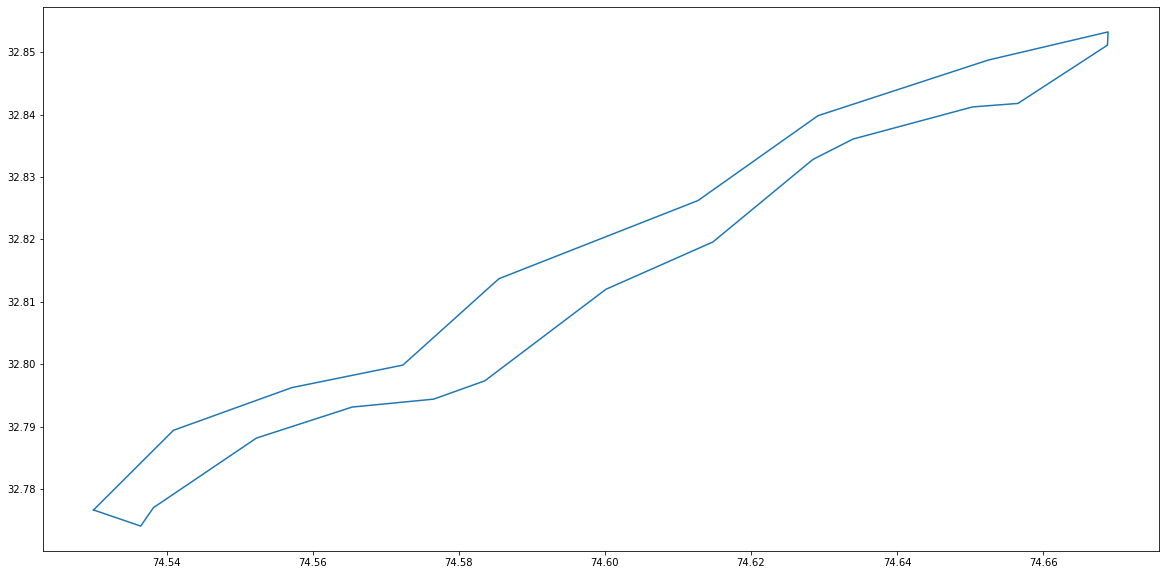

In [40]:
nominal_geometry = get_nominal_geometry(WATERBODY_ID)
print(nominal_geometry)
plot_geometry(nominal_geometry)